# Networks 4, Advanced Measures

#### Exercise: Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

In [2]:
#  Loading the graph from Github as decribed in the exercise
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import requests
import random

url = r"https://raw.githubusercontent.com/noanorgaard/SocialGraphs/refs/heads/main/Assignment1/rock_music_graph1.graphml"# Loading graph from a GraphML file from a URL

data = requests.get(url).text   # decode to string, not bytes
G = nx.parse_graphml(data)

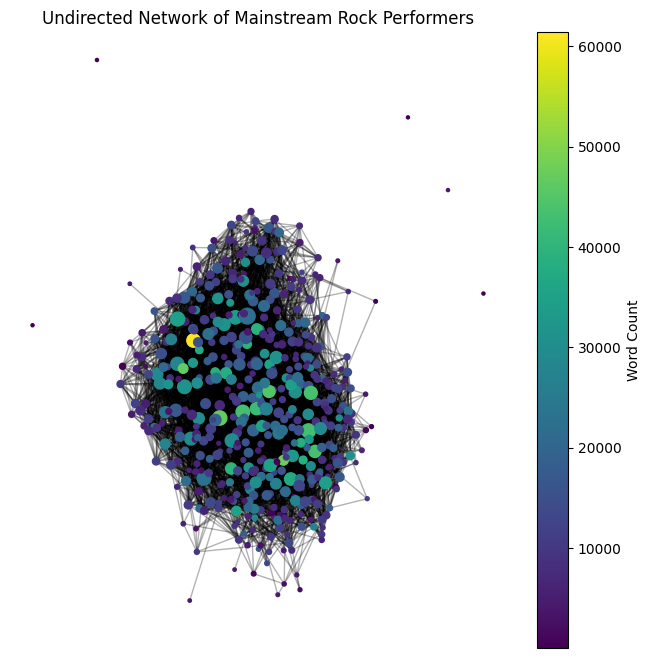

In [4]:
#Visualize the network using NetworkX
#Node color should depend on the length_of_content attribute (see notes from last week).
#Node size should depend on the node degree
#Play with the force atlas algorithm parameters to obtain a visualization you like.

# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# plot the undirected graph
plt.figure(figsize=(8,8))
# pos = nx.spring_layout(G_undirected, seed=42, k = 0.8)  # positions for all 
pos = nx.forceatlas2_layout(G_undirected)
# node sizes based on degree

node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()